In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

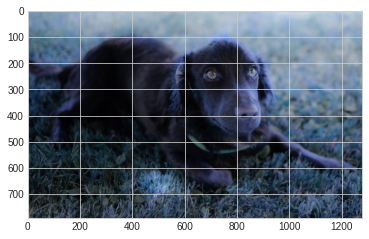

In [28]:
img = cv2.imread('sample-original-image-output.jpeg')
plt.imshow(img)

In [29]:
blue,green,red = cv2.split(img)

In [48]:
pca = PCA(20)


red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)
print(pca.explained_variance_ratio_)

[0.71948828 0.1299859  0.02382645 0.01548812 0.01019606 0.00887067
 0.00620065 0.00586186 0.00526559 0.00464932 0.00387735 0.00386857
 0.0035133  0.00296726 0.00270952 0.00256304 0.00234568 0.00227224
 0.0020249  0.00185217]


In [49]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

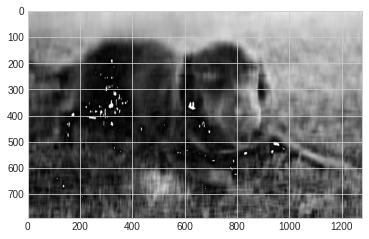

In [50]:
plt.imshow(img_compressed)

In [26]:
from IPython.display import Audio
from scipy.io import wavfile

samplerate, test = wavfile.read('test.wav')

start = samplerate * 14
end = start + samplerate * 10
Audio(data=test[start:end, 0], rate=samplerate)

In [23]:
from sklearn.decomposition import PCA
import numpy as np

def pca_reduce(signal, n_components, block_size=1024):
    
    samples = len(signal)
    hanging = block_size - np.mod(samples, block_size)
    padded = np.lib.pad(signal, (0, hanging), 'constant', constant_values=0)
    
    reshaped = padded.reshape((len(padded) // block_size, block_size))
    
    pca = PCA(n_components=n_components)
    pca.fit(reshaped)
    
    transformed = pca.transform(reshaped)
    reconstructed = pca.inverse_transform(transformed).reshape((len(padded)))
    return pca, transformed, reconstructed

In [24]:
test_left = test[:,0]

_, _, reconstructed = pca_reduce(test_left, 1024, 1024)

Audio(data=reconstructed[start:end], rate=samplerate)

In [25]:
_, _, reconstructed = pca_reduce(test_left, 32, 1024)

Audio(data=reconstructed[start:end], rate=samplerate)